# **Data Exploration :**

in this notebook, we will explore the dataset [Ecommerce Text Classification](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification) by analyzing coulomns, rows and check if there's missing data.

We use a public e-commerce text classification dataset containing product titles, descriptions, and category labels.

**Dataset characteristics:**
- Real-world e-commerce product data  
- Text fields: `title`, `description`  
- Target: `category`  
- Multiple product categories

# **1 - Packages :**

let's import the main packages used for this task :

In [ ]:
import pandas as pd
import numpy as np

# **2 - Data loading :**

In [ ]:
try:
    df = pd.read_csv('ecommerceDataset.csv', header=None, names=['label', 'text_feature'], sep='~', on_bad_lines='skip')

    # Now that we've correctly named the columns, dropna on 'label' and 'text_feature'
    df.dropna(subset=['label', 'text_feature'], inplace=True)

    print(f"Dataset loaded successfully : {len(df)} products.")

except FileNotFoundError:
    print("non file found")
    # Génération de données factices si vous n'avez pas le CSV
    data = {
        'text_feature': [
            'Sony Headphones Wireless Noise Cancelling', 'Levis Men Jeans Cotton Blue',
            'Instant Pot Pressure Cooker Kitchen', 'Harry Potter Book JK Rowling',
            'Samsung TV 4K Smart LED', 'Nike Running Shoes Air Zoom',
            'Blender Smoothie Maker Glass', 'Python Programming Guide OReilly'
        ] * 100,
        'label': ['Electronics', 'Clothing', 'Home', 'Books', 'Electronics', 'Clothing', 'Home', 'Books'] * 100
    }
    df = pd.DataFrame(data)

Dataset loaded successfully : 59 products.


# **3 - Data Exploration**

In [ ]:
# Display first rows
df.head()

label  \
108  Household,"Voberry Magic Embroidery Pen Punch ...   
116  Household,"Voberry Magic Embroidery Pen Punch ...   
558  Household,"MagiDeal 14 Pieces Red Rose Flower ...   
559  Household,"MagiDeal 14 Pieces Red Rose Flower ...   
651  Household,"Zerone 1Pc Washable Kraft Paper Bag...   

                                          text_feature  
108   2cm error because munual measurement Posted b...  
116   2cm error because munual measurement Posted b...  
558   5.4x2.9cm / 2.13x1.14inch - Color: As picture...  
559   5.4x2.9cm / 2.13x1.14inch - Color: As picture...  
651  128g  Package Include:  1 × Washable Kraft Pap...

In [ ]:
# Shape of dataset
print("Dataset shape:", df.shape)

Dataset shape: (59, 2)


In [ ]:
# Column names
print("\nColumns:")
print(df.columns)


Columns:
Index(['label', 'text_feature'], dtype='object')


In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 108 to 18769
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         59 non-null     object
 1   text_feature  59 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

label           0
text_feature    0
dtype: int64

###  **Data cleaning**

In [ ]:
# Rename columns if needed
df.columns = ["Category", "Description"]

# Drop missing values
df = df.dropna()

# Reset index
df = df.reset_index(drop=True)

print("New shape after cleaning:", df.shape)

New shape after cleaning: (59, 2)


## **Categories distribution :**

In [ ]:
# Count categories
category_counts = df["Category"].value_counts()

print(category_counts)

Category
Household,"Nanki Trades Wax Tea Light Candle (White, Set of 100) Item Package Quantity:100   Set of 50 Paraffin Wax tea light candles. Each candle weighs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# **4 - Data visualization :**

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot category distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Category", order=category_counts.index)
plt.xticks(rotation=45)
plt.title("Distribution of Product Categories")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12316 (\N{WAVE DASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


### **preprocessing text**

In [ ]:
# Text processing
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    return text

df["clean_text"] = df["Description"].apply(clean_text)

df.head()

Category  \
0  Household,"Voberry Magic Embroidery Pen Punch ...   
1  Household,"Voberry Magic Embroidery Pen Punch ...   
2  Household,"MagiDeal 14 Pieces Red Rose Flower ...   
3  Household,"MagiDeal 14 Pieces Red Rose Flower ...   
4  Household,"Zerone 1Pc Washable Kraft Paper Bag...   

                                         Description  text_length  \
0   2cm error because munual measurement Posted b...          100   
1   2cm error because munual measurement Posted b...          100   
2   5.4x2.9cm / 2.13x1.14inch - Color: As picture...           25   
3   5.4x2.9cm / 2.13x1.14inch - Color: As picture...           25   
4  128g  Package Include:  1 × Washable Kraft Pap...           44   

                                          clean_text  
0   cm error because munual measurement posted by...  
1   cm error because munual measurement posted by...  
2   xcm  xinch  color as picture shownpackage inc...  
3   xcm  xinch  color as picture shownpackage inc...  
4  g  package include    washable kraft paper bag...

# **5 - Feature Exploration :**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")

X = vectorizer.fit_transform(df["clean_text"])

print("TF-IDF shape:", X.shape)

TF-IDF shape: (59, 786)


In [ ]:
# Show top 20 feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

['aa' 'aberration' 'ability' 'accentsbedroombaby' 'access' 'accessories'
 'act' 'actual' 'adapter' 'adding' 'addition' 'additional' 'address'
 'addressmobile' 'adpater' 'air' 'alarm' 'allow' 'allowable' 'allows']


In [ ]:
# Percentage per class
category_percentage = df["Category"].value_counts(normalize=True) * 100
category_percentage

Category
Household,"Nanki Trades Wax Tea Light Candle (White, Set of 100) Item Package Quantity:100   Set of 50 Paraffin Wax tea light candles. Each candle weighs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                13.559322
Household,"Voberry Magic Embroidery Pen Punch Needle, Magic Embroidery Pen Set Craft Tool for DIY Threaders Sewing Blue Color Name:Blue    Feature:  100% brand new and high quality   Material: plastic + silica gel  Property: Stocked,  Environmentally Friendly  Size:Approx.13*2cm  There is 1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       3.389831
Household,"MagiDeal 14 Pieces Red Rose Flower Patch Embroidered Iron On Applique Patches for Clothes Bag Hat Dress DIY Description: - Top Quality, Detailed Embroidery - 14 styles rose flower applique, makes your clothes or bags look unique and beautiful - Patch can be Iron on with Heat or Sew - Great for Decorating or Repair the clothes - Perfect for Jeans, Jackets, Vests, Hats, Gear Bags, Scrapbooking and moreSpecification: - Material: Fabric, Glue - Size: Approx. 10.2 x 5.4cm / 4.02x2.13inch                                                                                                                                                                                                                                                                                                                                                                                               

# **6 - Text length analysis :**

In [19]:
# Compute text length
df["text_length"] = df["Description"].apply(lambda x: len(x.split()))

df["text_length"].describe()

count     59.000000
mean      71.271186
std       61.317666
min        1.000000
25%       22.000000
50%       53.000000
75%      103.000000
max      257.000000
Name: text_length, dtype: float64

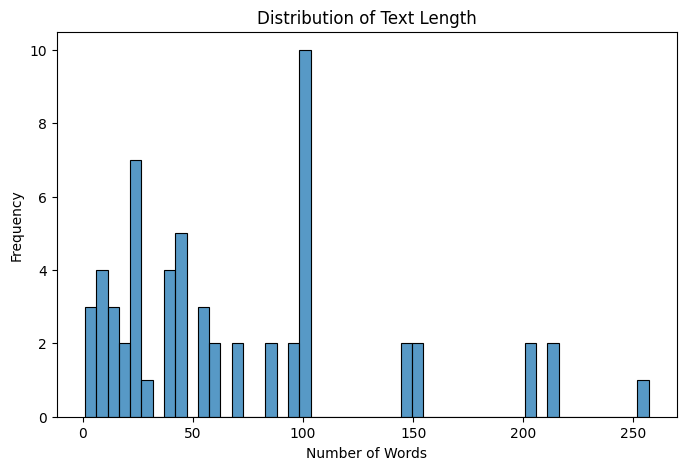

In [20]:
# Plot text length distribution
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()